In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()

# Importing dataset
df = pd.read_csv('training_data.csv')

Saving training_data.csv to training_data.csv


In [ ]:
df

,id,category,title,body
0,5639,International_Finance,How Has Devaluation of the Yuan Impacted Globa...,How Has the Devaluation of the Yuan Impacted G...
1,2673,Earning_Reports,Qorvo® Announces Fiscal 2022 Third Quarter Fin...,"GREENSBORO, N.C., Feb. 02, 2022 (GLOBE NEWSWIR..."
2,2056,Commodities,Why Gatos Silver Stock Fell Another 15.5% at t...,Shares of Gatos Silver (NYSE:GATO) fell 15.5% ...
3,3455,Economy,Healthcare industry expects Budget 2022 to hik...,Healthcare industry expects Budget 2022 to hik...
4,4406,Fraud,American FX Fund CEO Sent to Jail for Running ...,The U.S Federal Bureau of Investigation (FBI) ...
...,...,...,...,...
8037,10024,Real_Estate,United Real Estate expands to Alabama with 2nd...,Dallas-based brokerage and franchisor United R...
8038,167,Capital,CTDOT Marks Transit Equity Day 2022 with Commi...,"(Newington, CT) - The Connecticut Department o..."
8039,2533,Earning_Reports,Lee Enterprises reports strong digital growth ...,Digital-only subscribers grew 57%; exceeds hal...
8040,5543,International_Finance,Fuel for Thought: Persian Gulf energy producer...,Geopolitics has jumped ahead of market fundame...


In [ ]:
df['category'].unique()

array(['International_Finance', 'Earning_Reports', 'Commodities',
       'Economy', 'Fraud', 'Mergers_Acquisitions', 'Policy', 'Oil',
       'Capital', 'Litigation', 'Real_Estate'], dtype=object)

In [ ]:
label_encoder =preprocessing.LabelEncoder()
label_encoder.fit(df['category'])
df['label']=label_encoder.transform(df['category'])

In [ ]:
df['label'].unique()

array([ 5,  2,  1,  3,  4,  7,  9,  8,  0,  6, 10])

In [ ]:
df

,id,category,title,body,label
0,5639,International_Finance,How Has Devaluation of the Yuan Impacted Globa...,How Has the Devaluation of the Yuan Impacted G...,5
1,2673,Earning_Reports,Qorvo® Announces Fiscal 2022 Third Quarter Fin...,"GREENSBORO, N.C., Feb. 02, 2022 (GLOBE NEWSWIR...",2
2,2056,Commodities,Why Gatos Silver Stock Fell Another 15.5% at t...,Shares of Gatos Silver (NYSE:GATO) fell 15.5% ...,1
3,3455,Economy,Healthcare industry expects Budget 2022 to hik...,Healthcare industry expects Budget 2022 to hik...,3
4,4406,Fraud,American FX Fund CEO Sent to Jail for Running ...,The U.S Federal Bureau of Investigation (FBI) ...,4
...,...,...,...,...,...
8037,10024,Real_Estate,United Real Estate expands to Alabama with 2nd...,Dallas-based brokerage and franchisor United R...,10
8038,167,Capital,CTDOT Marks Transit Equity Day 2022 with Commi...,"(Newington, CT) - The Connecticut Department o...",0
8039,2533,Earning_Reports,Lee Enterprises reports strong digital growth ...,Digital-only subscribers grew 57%; exceeds hal...,2
8040,5543,International_Finance,Fuel for Thought: Persian Gulf energy producer...,Geopolitics has jumped ahead of market fundame...,5


In [ ]:
vectorizer=TfidfVectorizer(stop_words='english', max_features=1000)

In [ ]:
x=df['body']
y=df['label']

In [ ]:
vectorized_x=vectorizer.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(vectorized_x, y, test_size=0.25, random_state=1)


In [ ]:
clf=RandomForestClassifier()


In [ ]:
clf.fit(vectorized_x,y)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9676777722526106


In [ ]:
class_report = classification_report(y_test, y_pred, target_names=df['category'].unique())
print("Classification Report:\n", class_report)


Classification Report:
                        precision    recall  f1-score   support

International_Finance       0.96      0.95      0.96       215
      Earning_Reports       0.98      0.97      0.98       194
          Commodities       0.99      0.99      0.99       154
              Economy       0.93      0.98      0.96       280
                Fraud       0.95      0.97      0.96       150
 Mergers_Acquisitions       0.96      0.95      0.96       213
               Policy       0.98      0.97      0.97       144
                  Oil       0.95      0.99      0.97       181
              Capital       0.99      0.99      0.99       158
           Litigation       0.99      0.94      0.96       248
          Real_Estate       0.99      0.93      0.96        74

             accuracy                           0.97      2011
            macro avg       0.97      0.97      0.97      2011
         weighted avg       0.97      0.97      0.97      2011



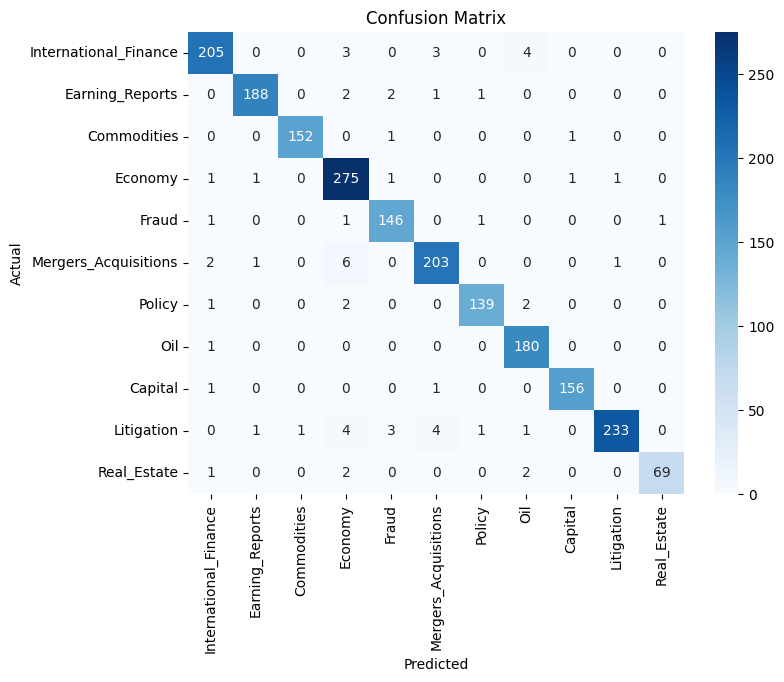

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['category'].unique(), yticklabels=df['category'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
